In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
import cv2
import os
import PIL

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file("flower_photos",origin=dataset_url,cache_dir="c:\Desktop",untar=True)

228818944/228813984 [==============================] - 2s 0us/step


In [ ]:
data_dir

'/tmp/.keras/datasets/flower_photos'

In [ ]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('/tmp/.keras/datasets/flower_photos')

In [ ]:
image_count=len(list(data_dir.glob("*/*.jpg")))

In [ ]:
image_count

3670

In [ ]:
roses=list(data_dir.glob("roses/*"))
roses[:5]

[PosixPath('/tmp/.keras/datasets/flower_photos/roses/3109712111_75cea2dee6.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/18376177250_86060cbdc9.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/2735666555_01d53e74fe.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/14414100710_753a36fce9.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/roses/7551637034_55ae047756_n.jpg')]

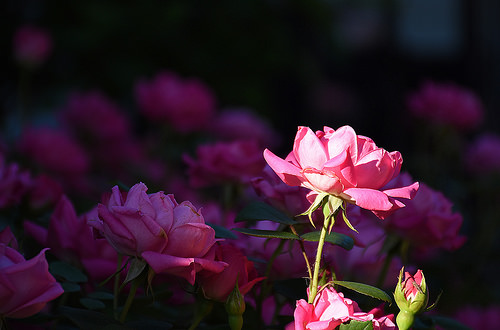

In [ ]:
PIL.Image.open(str(roses[1]))

In [ ]:
tulips=list(data_dir.glob("tulips/*"))

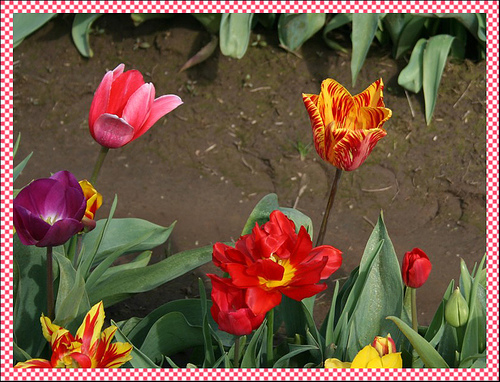

In [ ]:
PIL.Image.open(str(tulips[0]))

In [ ]:
flowers_image_dict={
    "roses":list(data_dir.glob("roses/*")),
    "daisy":list(data_dir.glob("daisy/*")),
    "dandelion":list(data_dir.glob("dandelion/*")),
    "sunflowers":list(data_dir.glob("sunflowes/*")),
    "tulips":list(data_dir.glob("tulips/*"))
}

In [ ]:
flowers_labels_dict={
    "roses":0,
    "daisy":1,
    "dandelion":2,
    "sunflowers":3,
    "tulips":4
}

In [ ]:
flowers_image_dict["roses"][0]

PosixPath('/tmp/.keras/datasets/flower_photos/roses/3109712111_75cea2dee6.jpg')

In [ ]:
img=cv2.imread(str(flowers_image_dict["roses"][0]))

In [ ]:
img.shape

(333, 500, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
x,y=[],[]
for flower_name,images in flowers_image_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resize_image=cv2.resize(img,(180,180))
    x.append(resize_image)
    y.append(flowers_labels_dict[flower_name])

In [ ]:
x[0]

array([[[42, 82, 88],
        [39, 84, 93],
        [43, 81, 96],
        ...,
        [20, 16, 13],
        [25, 19, 17],
        [ 7,  6,  3]],

       [[39, 83, 89],
        [39, 82, 96],
        [44, 83, 96],
        ...,
        [15, 12, 11],
        [19, 15, 14],
        [ 5,  4,  3]],

       [[36, 82, 93],
        [39, 84, 92],
        [41, 83, 92],
        ...,
        [ 6,  6,  6],
        [10,  8,  7],
        [ 5,  3,  3]],

       ...,

       [[ 1,  4,  6],
        [ 1,  1,  3],
        [ 4,  6,  7],
        ...,
        [39, 80, 89],
        [36, 80, 92],
        [36, 82, 89]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [37, 78, 91],
        [36, 79, 88],
        [37, 78, 90]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [33, 76, 90],
        [33, 79, 89],
        [34, 78, 85]]], dtype=uint8)

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [ ]:
len(x_train)

2079

In [ ]:
len(x_test)

892

In [ ]:
x[0]

array([[[42, 82, 88],
        [39, 84, 93],
        [43, 81, 96],
        ...,
        [20, 16, 13],
        [25, 19, 17],
        [ 7,  6,  3]],

       [[39, 83, 89],
        [39, 82, 96],
        [44, 83, 96],
        ...,
        [15, 12, 11],
        [19, 15, 14],
        [ 5,  4,  3]],

       [[36, 82, 93],
        [39, 84, 92],
        [41, 83, 92],
        ...,
        [ 6,  6,  6],
        [10,  8,  7],
        [ 5,  3,  3]],

       ...,

       [[ 1,  4,  6],
        [ 1,  1,  3],
        [ 4,  6,  7],
        ...,
        [39, 80, 89],
        [36, 80, 92],
        [36, 82, 89]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [37, 78, 91],
        [36, 79, 88],
        [37, 78, 90]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [33, 76, 90],
        [33, 79, 89],
        [34, 78, 85]]], dtype=uint8)

In [ ]:
x_train_scale=x_train/255
x_test_scale=x_test/255

In [ ]:
model=keras.Sequential(
    [
     keras.layers.Conv2D(filters=40,kernel_size=(3,3),strides=(1,1),padding="same",input_shape=(180,180,3),activation="relu"),
     keras.layers.MaxPooling2D((2,2)),
     keras.layers.Conv2D(filters=70,kernel_size=(3,3),padding="same",activation="relu"),
     keras.layers.MaxPooling2D((2,2)),

     keras.layers.Flatten(),
     keras.layers.Dense(100,activation="relu"),
     keras.layers.Dropout(0.5),
     keras.layers.Dense(5,activation="softmax")
    ]
)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)
model.fit(x_train_scale,y_train,epochs=50)

Epoch 1/50
65/65 [==============================] - 3s 35ms/step - loss: 2.6508 - accuracy: 0.3255
Epoch 2/50
65/65 [==============================] - 2s 34ms/step - loss: 1.1686 - accuracy: 0.4850
Epoch 3/50
65/65 [==============================] - 2s 34ms/step - loss: 0.9790 - accuracy: 0.5898
Epoch 4/50
65/65 [==============================] - 2s 34ms/step - loss: 0.8070 - accuracy: 0.6816
Epoch 5/50
65/65 [==============================] - 2s 35ms/step - loss: 0.6217 - accuracy: 0.7809
Epoch 6/50
65/65 [==============================] - 2s 35ms/step - loss: 0.4738 - accuracy: 0.8188
Epoch 7/50
65/65 [==============================] - 2s 35ms/step - loss: 0.3339 - accuracy: 0.8811
Epoch 8/50
65/65 [==============================] - 2s 35ms/step - loss: 0.3098 - accuracy: 0.9082
Epoch 9/50
65/65 [==============================] - 2s 35ms/step - loss: 0.2744 - accuracy: 0.9221
Epoch 10/50
65/65 [==============================] - 2s 35ms/step - loss: 0.1445 - accuracy: 0.9518
Epoch 11/

In [ ]:
model.evaluate(x_test_scale,y_test)

28/28 [==============================] - 1s 17ms/step - loss: 2.5384 - accuracy: 0.6177


[2.538391590118408, 0.6177130341529846]

In [ ]:
y_predict=model.predict(x_test_scale)

In [ ]:
np.argmax(y_predict[400])

2

In [ ]:
y_test[400]

0

In [ ]:
y_predict[0]

array([8.5681510e-01, 2.2309902e-04, 8.4000982e-02, 5.5011173e-10,
       5.8960825e-02], dtype=float32)

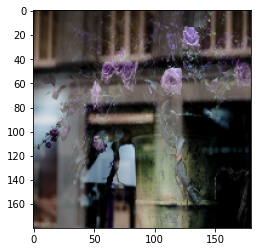

In [ ]:
plt.imshow(x_test_scale[400])

In [ ]:
data_augmentation=keras.Sequential(
    [
     keras.layers.experimental.preprocessing.RandomRotation(0.3),
     keras.layers.experimental.preprocessing.RandomZoom(0.3)
    ]
)

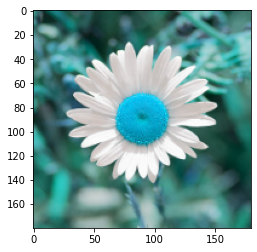

In [ ]:
plt.imshow(x_train[30])

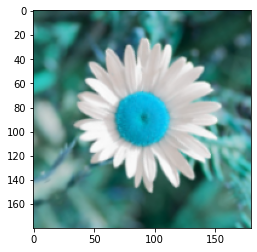

In [ ]:
plt.imshow(np.array(data_augmentation(x_train)[30]))

In [ ]:
model=keras.Sequential(
    [
     data_augmentation,
     keras.layers.Conv2D(filters=40,kernel_size=(3,3),strides=(1,1),padding="same",input_shape=(180,180,3),activation="relu"),
     keras.layers.MaxPooling2D((2,2)),
     keras.layers.Conv2D(filters=70,kernel_size=(3,3),padding="same",activation="relu"),
     keras.layers.MaxPooling2D((2,2)),

     keras.layers.Flatten(),
     keras.layers.Dense(100,activation="relu"),
     keras.layers.Dropout(0.5),
     keras.layers.Dense(5,activation="softmax")
    ]
)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)
model.fit(x_train_scale,y_train,epochs=50)

Epoch 1/50
65/65 [==============================] - 3s 38ms/step - loss: 2.3490 - accuracy: 0.3126
Epoch 2/50
65/65 [==============================] - 2s 37ms/step - loss: 1.1904 - accuracy: 0.4800
Epoch 3/50
65/65 [==============================] - 2s 37ms/step - loss: 1.0875 - accuracy: 0.5172
Epoch 4/50
65/65 [==============================] - 2s 37ms/step - loss: 1.0853 - accuracy: 0.5586
Epoch 5/50
65/65 [==============================] - 2s 37ms/step - loss: 1.0020 - accuracy: 0.5830
Epoch 6/50
65/65 [==============================] - 2s 37ms/step - loss: 1.0223 - accuracy: 0.5863
Epoch 7/50
65/65 [==============================] - 2s 37ms/step - loss: 0.9917 - accuracy: 0.6045
Epoch 8/50
65/65 [==============================] - 2s 37ms/step - loss: 0.9136 - accuracy: 0.6191
Epoch 9/50
65/65 [==============================] - 2s 37ms/step - loss: 0.9243 - accuracy: 0.6208
Epoch 10/50
65/65 [==============================] - 2s 37ms/step - loss: 0.8736 - accuracy: 0.6532
Epoch 11/

In [ ]:
model.evaluate(x_test_scale,y_test)

28/28 [==============================] - 1s 16ms/step - loss: 0.7714 - accuracy: 0.7040


[0.7714386582374573, 0.7040358781814575]